In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [5]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [6]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [8]:
df['charges'].mean()

np.float64(13270.422265141257)

In [9]:
## find out average charges of male female
## population data and sample data 
df_male = df[df['sex']=="male"]

In [10]:
print("male average:" , df_male['charges'].mean())

male average: 13956.751177721893


In [11]:
df_female = df[df['sex']=="female"]
print("female average:" ,df_female['charges'].mean())

female average: 12569.578843835347


In [12]:
df_mean_charges = df_female[df_female['charges'] >= 12569.578843835347]
df_mean_charges.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
20,60,female,36.005,0,no,northeast,13228.84695
23,34,female,31.920,1,yes,northeast,37701.87680


In [13]:
df_mean_charges2 = df_female[df_female['charges'] <= 12569.578843835347]
df_mean_charges2.head()

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
13,56,female,39.82,0,no,southeast,11090.7178
16,52,female,30.78,1,no,northeast,10797.3362


In [14]:
df_mean_charges2.shape

(441, 7)

In [15]:
df_mean_charges.shape

(221, 7)

In [16]:
df_mean_charges2['smoker'].value_counts()

smoker
no    441
Name: count, dtype: int64

In [17]:
df_mean_charges2['children'].value_counts()

children
0    187
1    115
2     78
3     48
4      7
5      6
Name: count, dtype: int64

In [18]:
df_mean_charges2['region'].value_counts()

region
southwest    120
northwest    113
southeast    112
northeast     96
Name: count, dtype: int64

In [19]:
# feature engineering
# 18.5 < ==> underweight
# 18.5 ro 24.9 <==> healthy weight
# 25 tp 29.9  <==> overeight

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
df.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges' ]

In [22]:
ls = list(df['bmi'])
ls


[27.9,
 33.77,
 33.0,
 22.705,
 28.88,
 25.74,
 33.44,
 27.74,
 29.83,
 25.84,
 26.22,
 26.29,
 34.4,
 39.82,
 42.13,
 24.6,
 30.78,
 23.845,
 40.3,
 35.3,
 36.005,
 32.4,
 34.1,
 31.92,
 28.025,
 27.72,
 23.085,
 32.775,
 17.385,
 36.3,
 35.6,
 26.315,
 28.6,
 28.31,
 36.4,
 20.425,
 32.965,
 20.8,
 36.67,
 39.9,
 26.6,
 36.63,
 21.78,
 30.8,
 37.05,
 37.3,
 38.665,
 34.77,
 24.53,
 35.2,
 35.625,
 33.63,
 28.0,
 34.43,
 28.69,
 36.955,
 31.825,
 31.68,
 22.88,
 37.335,
 27.36,
 33.66,
 24.7,
 25.935,
 22.42,
 28.9,
 39.1,
 26.315,
 36.19,
 23.98,
 24.75,
 28.5,
 28.1,
 32.01,
 27.4,
 34.01,
 29.59,
 35.53,
 39.805,
 32.965,
 26.885,
 38.285,
 37.62,
 41.23,
 34.8,
 22.895,
 31.16,
 27.2,
 27.74,
 26.98,
 39.49,
 24.795,
 29.83,
 34.77,
 31.3,
 37.62,
 30.8,
 38.28,
 19.95,
 19.3,
 31.6,
 25.46,
 30.115,
 29.92,
 27.5,
 28.025,
 28.4,
 30.875,
 27.94,
 35.09,
 33.63,
 29.7,
 30.8,
 35.72,
 32.205,
 28.595,
 49.06,
 27.94,
 27.17,
 23.37,
 37.1,
 23.75,
 28.975,
 31.35,
 33.915,
 28.78

In [23]:
label = []
for w in ls:
    if w<18.5:
        label.append("Underweight")
    elif w > 18.5 and w <24.9:
        label.append("HealthyWeight")
    elif w>25.0 and w <29.9:
        label.append("Overweight")
    else:
        label.append("obese")

In [24]:
len(label)

1338

In [25]:
df.shape

(1338, 7)

In [26]:
df['health_category'] = label

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges,health_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [28]:
df[df['health_category'] == "HealthyWeight"].value_counts()

age  sex     bmi     children  smoker  region     charges      health_category
18   female  20.790  0         no      southeast  1607.51010   HealthyWeight      1
             21.660  0         yes     northeast  14283.45940  HealthyWeight      1
             24.090  1         no      southeast  2201.09710   HealthyWeight      1
     male    21.470  0         no      northeast  1702.45530   HealthyWeight      1
             21.565  0         yes     northeast  13747.87235  HealthyWeight      1
                                                                                 ..
63   female  23.085  0         no      northeast  14451.83515  HealthyWeight      1
     male    21.660  1         no      northwest  14349.85440  HealthyWeight      1
64   female  22.990  0         yes     southeast  27037.91410  HealthyWeight      1
     male    23.760  0         yes     southeast  26926.51440  HealthyWeight      1
             24.700  1         no      northwest  30166.61817  HealthyWeight     

In [29]:
health_counts = df.groupby('health_category')

In [30]:
health_counts[['charges']].mean()

,charges
health_category,
HealthyWeight,10404.900084
Overweight,11020.183782
Underweight,8852.200585
obese,15420.399577


In [31]:
health_Analysis =health_counts['charges'].agg(min_charges='min',max_charges='max',mean_charges='mean')


In [32]:
health_Analysis.sort_values('mean_charges')

,min_charges,max_charges,mean_charges
health_category,,,
Underweight,1621.3402,32734.18630,8852.200585
HealthyWeight,1121.8739,35069.37452,10404.900084
Overweight,1252.4070,38245.59327,11020.183782
obese,1131.5066,63770.42801,15420.399577


In [33]:
health_Classes = list(health_Analysis.index)

In [34]:
health_Analysis['mean_charges']

health_category
HealthyWeight    10404.900084
Overweight       11020.183782
Underweight       8852.200585
obese            15420.399577
Name: mean_charges, dtype: float64

In [35]:
average_charges = (health_Analysis['mean_charges'].values)

<BarContainer object of 4 artists>

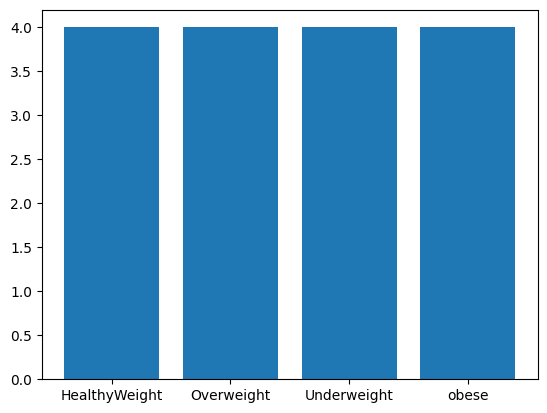

In [36]:
plt.bar(health_Classes, label=average_charges , height=4.0)

In [37]:
average_charges = (health_Analysis['min_charges'].values)

<BarContainer object of 4 artists>

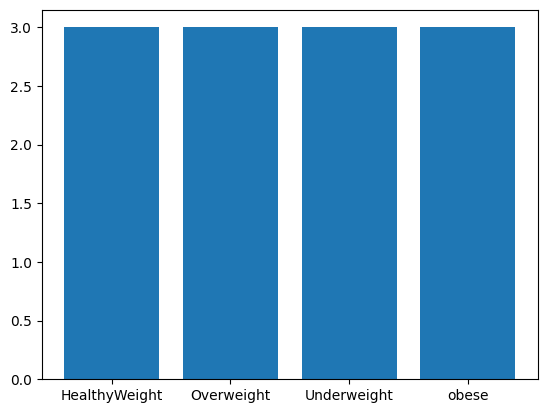

In [38]:
plt.bar(health_Classes, label=average_charges, height=3.0)

In [39]:
df

,age,sex,bmi,children,smoker,region,charges,health_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


In [40]:
regeion_counts = df.groupby('region')['charges'].agg(['min','max','mean'])


In [41]:
regeion_Classes = list(regeion_counts.index)

In [42]:
regeion_counts.value_counts()

min        max          mean        
1121.8739  63770.42801  14735.411438    1
1241.5650  52590.82939  12346.937377    1
1621.3402  60021.39897  12417.575374    1
1694.7964  58571.07448  13406.384516    1
Name: count, dtype: int64

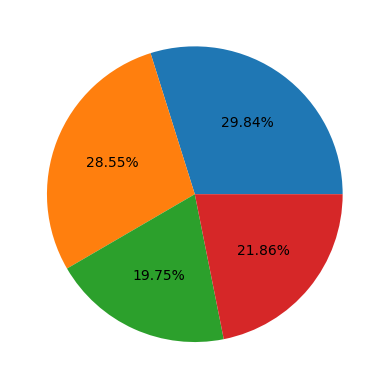

In [43]:
plt.pie(regeion_counts['min'] ,autopct="%.2f%%")
plt.show()

In [44]:
# gender===> onehot encode
dt = {'female':0 , 'male':1}
df['sex'] = df['sex'].map(dt)

    

In [45]:
smoker_dect = {'yes':1 , 'no':0} 

df['smoker'] = df['smoker'].map(smoker_dect)    

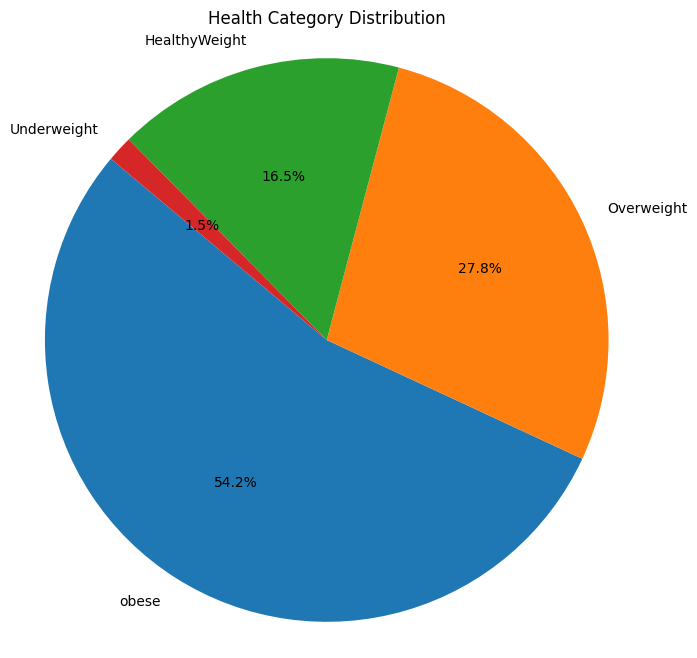

In [46]:
value_counts = df['health_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Health Category Distribution')
plt.axis('equal')
plt.show()


In [47]:
df['health_category'].value_counts()

health_category
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

In [48]:
health_category_dict = {'Underweight':'1' ,'HealthyWeight':'2' ,'Overweight':'3' ,'obese':'4'}
df['health_category'].map(health_category_dict)

0       3
1       4
2       4
3       2
4       3
       ..
1333    4
1334    4
1335    4
1336    3
1337    3
Name: health_category, Length: 1338, dtype: object

In [49]:
df.health_category.value_counts()

health_category
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

In [50]:

health_category2 = list(df.health_category.value_counts().keys())

In [51]:
health_category_dict = {'Underweight':1 ,'HealthyWeight':2 ,'Overweight':3 ,'obese':4}
df['health_category'] = df['health_category'].map(health_category_dict)

In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges,health_category
0,19,0,27.900,0,1,southwest,16884.92400,3
1,18,1,33.770,1,0,southeast,1725.55230,4
2,28,1,33.000,3,0,southeast,4449.46200,4
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,3


In [53]:
# label endcoding--heathy_category
# onehot endcoding---> sex 

### label Encode

In [54]:
final_data= pd.get_dummies(df).astype(int)  #====> onehot_endcoding representation

In [55]:
final_data.head()

,age,sex,bmi,children,smoker,charges,health_category,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,3,0,0,0,1
1,18,1,33,1,0,1725,4,0,0,1,0
2,28,1,33,3,0,4449,4,0,0,1,0
3,33,1,22,0,0,21984,2,0,1,0,0
4,32,1,28,0,0,3866,3,0,1,0,0


In [56]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'health_category'],
      dtype='object')

In [57]:
### x and y split
x= final_data.drop('charges' , axis='columns')
y= df['charges']


In [58]:
### training and testing
import sklearn

In [59]:
from sklearn.model_selection import  train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

model training

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor

In [62]:

lnr = LinearRegression()
Dtr = DecisionTreeRegressor()
rmdr = RandomForestRegressor() 
n_estimators=200 # hyer parameter truning---> to obtained highest accuracy
# training our model

In [63]:
x_test.shape , y_test.shape

((268, 10), (268,))

In [64]:
### model train
lnr.fit(x_train,y_train)
Dtr.fit(x_train,y_train)
rmdr.fit(x_train,y_train)
# print("you train your all algorithms")

RandomForestRegressor()

In [65]:
# model save


In [66]:
### model evaluation

In [67]:
print("Training score by linear:",lnr.score(x_train,y_train)*100)
print("Training score bt Decision Tree:",Dtr.score(x_train,y_train)*100)
print("Training score randomforest:", rmdr.score(x_train,y_train)*100)


Training score by linear: 75.47930789167157
Training score bt Decision Tree: 99.75272529117572
Training score randomforest: 97.51847757365361


In [68]:
print("Testing score by linear:",lnr.score(x_test,y_test)*100)
print("Testing score bt Decision Tree:",Dtr.score(x_test,y_test)*100)
print("Testing score randomforest:", rmdr.score(x_test,y_test)*100)


Testing score by linear: 74.54379587400607
Testing score bt Decision Tree: 68.39885175792115
Testing score randomforest: 84.83251626869108


In [69]:
### random_forest best fit
### prediction
prediction_linear= lnr.predict(x_test)
prediction_Decision_tree = Dtr.predict(x_test)
prediction_randomforest =rmdr.predict(x_test)


In [70]:
x_test

,age,sex,bmi,children,smoker,health_category,region_northeast,region_northwest,region_southeast,region_southwest
778,35,1,34,3,0,4,0,0,1,0
1046,43,0,25,0,0,3,1,0,0,0
1013,48,1,32,1,0,4,0,1,0,0
420,64,1,33,0,1,4,0,0,1,0
109,63,1,35,0,1,4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1255,42,0,37,0,0,4,0,0,0,1
506,22,1,31,1,0,4,0,1,0,0
998,33,0,36,3,0,4,1,0,0,0
518,35,0,31,1,0,4,0,0,0,1


In [71]:
print(y_test)

778      5934.3798
1046     7325.0482
1013     8765.2490
420     46889.2612
109     47055.5321
           ...    
1255     6474.0130
506      2643.2685
998      6551.7501
518      5240.7650
238     17352.6803
Name: charges, Length: 268, dtype: float64


In [72]:
comparision_df = pd.concat([x_test ,y_test] ,axis=1)

In [73]:
comparision_df

,age,sex,bmi,children,smoker,health_category,region_northeast,region_northwest,region_southeast,region_southwest,charges
778,35,1,34,3,0,4,0,0,1,0,5934.3798
1046,43,0,25,0,0,3,1,0,0,0,7325.0482
1013,48,1,32,1,0,4,0,1,0,0,8765.2490
420,64,1,33,0,1,4,0,0,1,0,46889.2612
109,63,1,35,0,1,4,0,0,1,0,47055.5321
...,...,...,...,...,...,...,...,...,...,...,...
1255,42,0,37,0,0,4,0,0,0,1,6474.0130
506,22,1,31,1,0,4,0,1,0,0,2643.2685
998,33,0,36,3,0,4,1,0,0,0,6551.7501
518,35,0,31,1,0,4,0,0,0,1,5240.7650


In [74]:
comparision_df["linear_prediction"] = prediction_linear
comparision_df["decision_prediction"] = prediction_Decision_tree

comparision_df["forest_prediction"] = prediction_randomforest





In [75]:
comparision_df.head(5)

,age,sex,bmi,children,smoker,health_category,region_northeast,region_northwest,region_southeast,region_southwest,charges,linear_prediction,decision_prediction,forest_prediction
778,35,1,34,3,0,4,0,0,1,0,5934.3798,9477.279911,5584.3057,6022.092450
1046,43,0,25,0,0,3,1,0,0,0,7325.0482,8109.869080,9282.4806,9623.618652
1013,48,1,32,1,0,4,0,1,0,0,8765.2490,12198.453731,9583.8933,9218.318382
420,64,1,33,0,1,4,0,0,1,0,46889.2612,39145.230925,46599.1084,48536.904793
109,63,1,35,0,1,4,0,0,1,0,47055.5321,39193.328777,46599.1084,47432.428411


In [76]:
comparision_df.to_csv('prediction.csv' , index=False)

In [77]:
final_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'health_category',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [78]:
### bmi remove , region --> label encode

In [79]:
final_data.drop('bmi' , axis=1, inplace=True)

In [80]:
final_data.head()

,age,sex,children,smoker,charges,health_category,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,0,1,16884,3,0,0,0,1
1,18,1,1,0,1725,4,0,0,1,0
2,28,1,3,0,4449,4,0,0,1,0
3,33,1,0,0,21984,2,0,1,0,0
4,32,1,0,0,3866,3,0,1,0,0


In [81]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
lbl_encode = LabelEncoder()

In [84]:
# region_category_dict = {'southeast':1 ,'southwest':2 ,'northwest':3 ,'northeast':4}
# df['region_category_dict'] = df['region'].map(region_category_dict)

In [85]:
# df['region_category_dict'].value_counts()

In [86]:
# df['region_category_dict'] = lbl_encode.fit_transform(df['region_category_dict'])

In [87]:
# df['region_category_dict'].value_counts()

In [88]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges,health_category
0,19,0,27.900,0,1,southwest,16884.92400,3
1,18,1,33.770,1,0,southeast,1725.55230,4
2,28,1,33.000,3,0,southeast,4449.46200,4
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,3
5,31,0,25.740,0,0,southeast,3756.62160,3
6,46,0,33.440,1,0,southeast,8240.58960,4
7,37,0,27.740,3,0,northwest,7281.50560,3
8,37,1,29.830,2,0,northeast,6406.41070,3
9,60,0,25.840,0,0,northwest,28923.13692,3


In [89]:
# to improve the performance of your model and algo.
# change your data pre-processing
# get sufficent amount of data
# linear , DT , random_forest==> used you can change your algorithms 
# default parameter used ===> now used hyper parameter truning


In [90]:
import joblib,os

In [91]:
os.makedirs('models',  exist_ok=True)
joblib.dump(lnr, './models/linear_model.ib')
joblib.dump(Dtr, './models/decisiontree_model.ib')
joblib.dump(lnr, './models/randomforest_model.ib')

['./models/randomforest_model.ib']

In [92]:
os.listdir()

['app.py',
 'insurance.csv',
 'insurance.ipynb',
 'insurance2.ipynb',
 'models',
 'prediction.csv',
 'static',
 'templates']

In [93]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'health_category'],
      dtype='object')

In [94]:
x_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'health_category',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [95]:
!pip install flask

In [97]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'health_category',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')